<a href="https://colab.research.google.com/github/MuhaddidAlavi/-Image-classification-using-the-CIFAR10-dataset/blob/main/Image_Classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
trainset = torchvision.datasets.CIFAR10(root = './data',train = True,download = True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers = 2)
testset  = torchvision.datasets.CIFAR10(root = './data',train = True,download = True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=True,num_workers = 2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


  car        deer       horse         cat


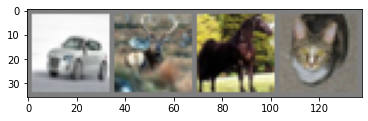

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(trainloader)
images,lavels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('       '.join('%5s' % classes[lavels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super (Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader,0):

    inputs,labels = data
    optimizer.zero_grad()
    output = net(inputs)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d,%5d] loss: %3f' %(epoch +1,i+1,running_loss/2000))
      running_loss =0.0

print('Finished Traing')

[1, 2000] loss: 2.090711
[1, 4000] loss: 1.953285
[1, 6000] loss: 1.957347
[1, 8000] loss: 1.954731
[1,10000] loss: 1.951876
[1,12000] loss: 1.949924
[2, 2000] loss: 1.940658
[2, 4000] loss: 1.929001
[2, 6000] loss: 1.956632
[2, 8000] loss: 1.959885
[2,10000] loss: 1.958410
[2,12000] loss: 1.956443
Finished Traing


GroundTruth:    car   cat   car horse


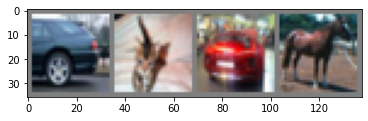

In [ ]:
dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
output = net(images)

In [ ]:
_, predicted = torch.max(output,1)
print ('Predicted : ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted :    car horse   car horse


Total Accuracy Calculation

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data
    output = net(images)
    _, predicted = torch.max(output,1)
    total +=labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy is : %d'%(100*correct/total))

Accuracy is : 26


Individual Classs Acuracy Calculation

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images,labels = data
    output = net(images)
    _, predicted = torch.max(output,1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] +=c[i].item()
      class_total[label] +=1

In [ ]:
for i in range(10):
  print('Accuracy of %5s : %2d %%'%(classes[i],100*class_correct[i]/class_total[i]))

Accuracy of plane : 30 %
Accuracy of   car : 59 %
Accuracy of  bird :  0 %
Accuracy of   cat : 24 %
Accuracy of  deer :  0 %
Accuracy of   dog :  5 %
Accuracy of  frog : 68 %
Accuracy of horse : 23 %
Accuracy of  ship : 44 %
Accuracy of truck : 12 %
